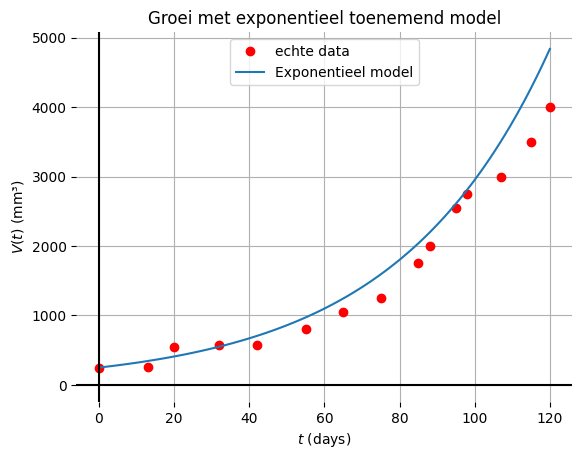

In [1]:
# Kleine test gebaseerd op: gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
# 2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
# BIO Web of Conferences 97, 00118)

import pandas as pd
from ode_solver import *

ts = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts, "$V$": Vs}).T

test1 = ode_solver(250, 120, 1)
dagen, volumes = test1.exponentieel_toenemend(0.025) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, "or", label = "echte data")
test1.plot(dagen, volumes, "Exponentieel model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met exponentieel toenemend model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

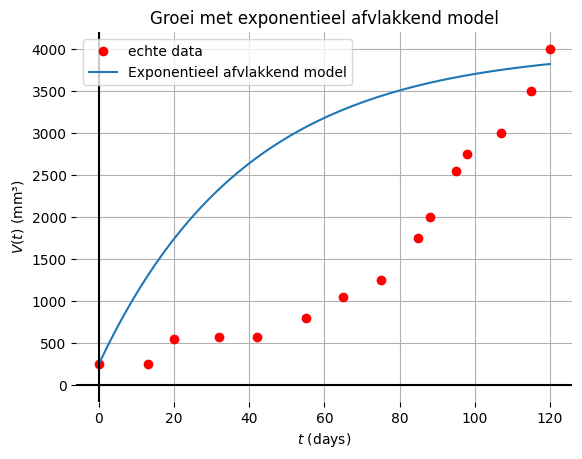

In [2]:
test2 = ode_solver(250, 120, 1)
dagen, volumes = test2.exponentieel_afvlakkend(0.025, 4000) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, "or", label = "echte data")
test2.plot(dagen, volumes, "Exponentieel afvlakkend model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met exponentieel afvlakkend model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan niet zo goed een lijn vormen door de data

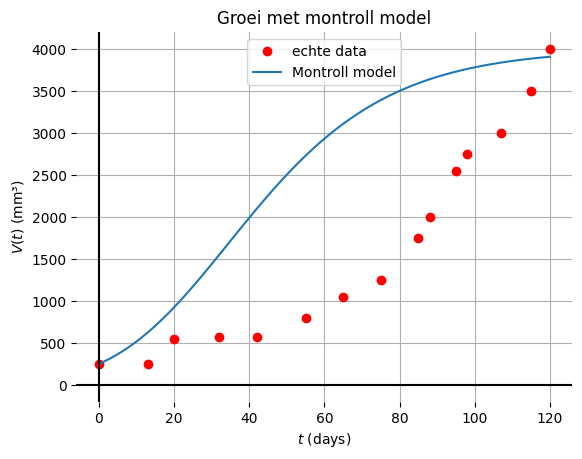

In [3]:
test3 = ode_solver(250, 120, 1)
dagen, volumes = test3.montroll(0.015, 0.28, 4000) # Hiermee dingen uitgeprobeerd 
                                          # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, "or", label = "echte data")
test3.plot(dagen, volumes, "Montroll model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met montroll model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan niet zo goed een lijn vormen door de data

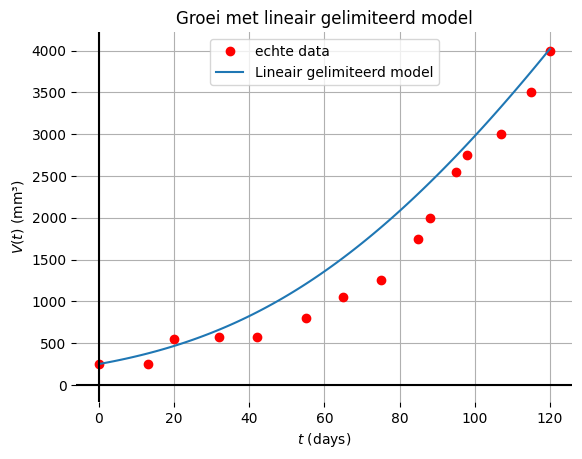

In [4]:
test4 = ode_solver(250, 120, 1)
dagen, volumes = test4.lineair_gelimiteerd(90, 2500) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, "or", label = "echte data")
test4.plot(dagen, volumes, "Lineair gelimiteerd model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met lineair gelimiteerd model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

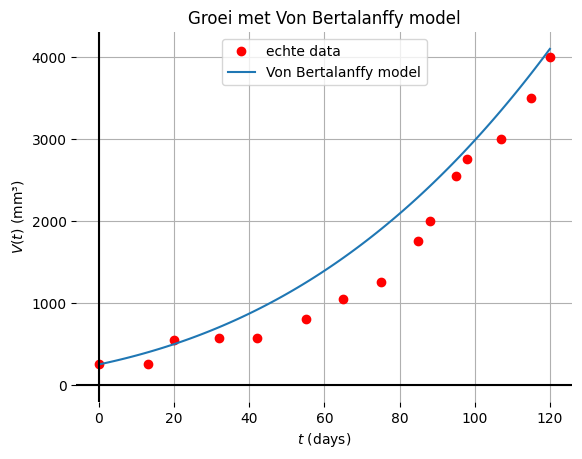

In [5]:
test5 = ode_solver(250, 120, 1)
dagen, volumes = test5.von_bertalanffy(0.25, 0.0005) # Hiermee dingen uitgeprobeerd 
                                                     # tot die redelijk er doorheen kwam

plt.plot(ts, Vs, "or", label = "echte data")
test5.plot(dagen, volumes, "Von Bertalanffy model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Von Bertalanffy model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Dit model kan redelijk goed een lijn vormen door de data

In [6]:
# Runge-kutta test:
import pandas as pd
from ode_solver import *

test6 = ode_solver(0.0, 20, (1.0/20))
dagen, volumes = test6.runge_kutta(1.0, 1.0)

In [7]:

from math import exp

Nsteps = 20
dt = 1.0 / Nsteps

ts_exact = [i * dt for i in range(Nsteps+1)]
ys_exact = [exp(t) - 1.0 for t in ts_exact]

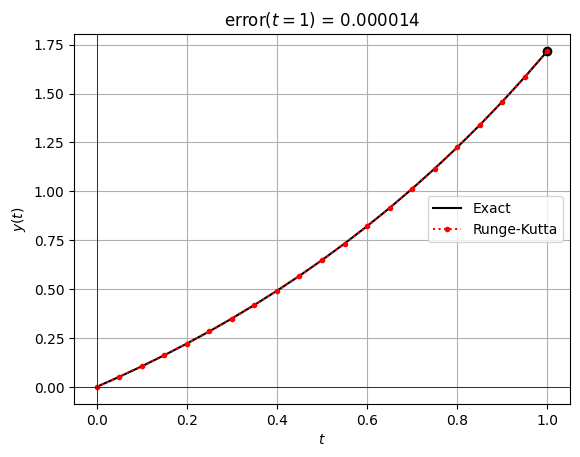

In [8]:
from matplotlib import pyplot as plt

plt.plot(ts_exact, ys_exact, "-k", label="Exact")
plt.plot(ts_exact[-1], ys_exact[-1], "ok")
plt.plot(dagen, volumes, ".:r", label="Runge-Kutta")
plt.axhline(0.0, lw=0.5, color="k"); plt.axvline(0.0, lw=0.5, color="k")
plt.grid(True); plt.legend()
plt.xlabel("$t$"); plt.ylabel("$y(t)$")
plt.title(f"error$(t=1)$ = {ys_exact[-1] - volumes[-1]:8.6f}")
plt.show()

De runge-kutta test was om te kijken of het overeenkomt met het voorbeeld uit de les

In [9]:
n = 20
v = 10
dt = 1.0 / n
ts_exact = [i * dt for i in range(n+1)]
ys_exact = [exp(t) - 1.0 for t in ts_exact]

model = ode_solver(v,n,dt)

params0 = {"c" : 100}

params = model.fit(
    echte_volumes = ys_exact,
    model = lambda c: model.exponentieel_toenemend(c),
    params0 = params0
)

print(params)

({'c': -19.895231676243295}, 5.55579825315453)


---

Vanaf hier netjes uitgewerkt om te gebruiken voor de demo notebook, alles hierboven zijn aantekeningen/klad!

---

# Voorbeeld 1:

Voor het eerste voorbeeld gaan we data gebruiken uit het artikel: _Comparative Study of Tumor Growth Based on Single Species Models_ gepubliceerd door S.S. Hassan & H.M. Al-Saedi, 
2024 ("Comparative Study of Tumor Growth Based on Single Species Models", 
BIO Web of Conferences 97, 00118)

Hiervoor gaan we de echte data uit dit onderzoek gebruiken en kijken of één of meerdere van onze modellen hier een goeie fit op kan toepassen. Om te beginnen gaan we voor elk model de AIC-waarde berekenen om te kijken welke het meest geschikt is.

In [10]:
# De exacte data inladen:
import pandas as pd
from ode_solver import *

ts_exact = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs_exact = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts_exact, "$V$": Vs_exact}).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
$t$,0,13,20,32,42,55,65,75,85,88,95,98,107,115,120
$V$,250,255,550,575,576,800,1050,1250,1750,2000,2550,2750,3000,3500,4000


In [11]:
# Voor elk model de AIC-waarde berekenen:
aantal_datapunten = len(Vs_exact)

print("AIC-waarde per model:")
solver = ode_solver(250, 15, 8)
params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)
exponentieel_toenemend_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Exponentieel toenemend: {round(exponentieel_toenemend_aic, 3)}")


params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, min_volume, max_volume: solver.allee(c, min_volume, max_volume),
    params0 = params0
)
allee_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Allee: {round(allee_aic, 3)}")


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)
exponentieel_afvlakkend_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Exponentieel afvlakkend: {round(exponentieel_afvlakkend_aic, 3)}")


params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, volume_max: solver.gompertz(c, volume_max),
    params0 = params0
)
gompertz_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Gompertz: {round(gompertz_aic, 3)}")


params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.lineair(c),
    params0 = params0
)
lineair_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Lineair: {round(lineair_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.lineair_gelimiteerd(c, d),
    params0 = params0
)
lineair_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Lineair gelimiteerd: {round(lineair_gelimiteerd_aic, 3)}")


params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: solver.logistisch(c, max_volume),
    params0 = params0
)
logistisch_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Logistisch: {round(logistisch_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.mendelsohn(c, d),
    params0 = params0
)
mendelsohn_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Mendelsohn: {round(mendelsohn_aic, 3)}")


params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d, max_volume: solver.montroll(c, d, max_volume),
    params0 = params0
)
montroll_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Montroll: {round(montroll_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)
oppervlakte_gelimiteerd_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Oppervlakte gelimiteerd: {round(oppervlakte_gelimiteerd_aic, 3)}")


params0 = {"c" : 0.0, "d" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: solver.von_bertalanffy(c, d),
    params0 = params0
)
von_bertalanffy_aic = solver.aic(mse, aantal_datapunten, len(params))
print(f"Von Bertalanffy: {round(von_bertalanffy_aic, 3)}")

AIC-waarde per model:
Exponentieel toenemend: 170.365
Allee: 227.351
Exponentieel afvlakkend: 172.374
Gompertz: 195.806
Lineair: 211.433
Lineair gelimiteerd: 140.24
Logistisch: 228.705
Mendelsohn: 143.839
Montroll: 165.146
Oppervlakte gelimiteerd: 171.864
Von Bertalanffy: 143.693


**OOK NOG BIC TOEVOEGEN**

Het lineair gelimiteerde model heeft de laagste AIC-waarde (~140.24), gevolgd door het Von Bertalanffy model (~143.693) en het Mendelsohn model (~143.839). Nu we het beste model hebben gekozen is het tijd om deze te gaan visualiseren.


**HIER PLOTTEN EN VERDERE UITLEG**

---

**Toch nog even een klad dingetje, hieronder plots voor elk model met de fit methode.**

---

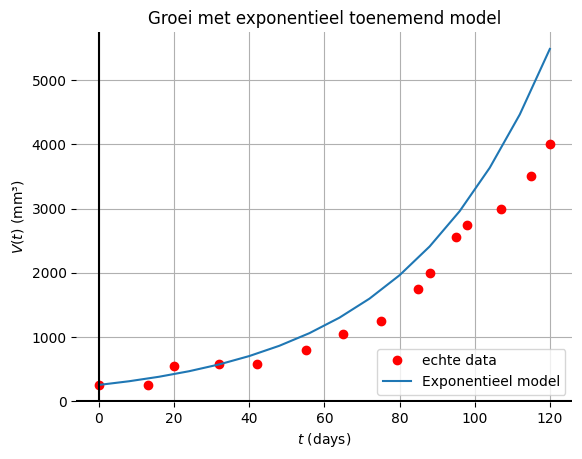

In [12]:
import pandas as pd
from ode_solver import *

ts_exact = [0, 13, 20, 32, 42, 55, 65, 75, 85, 88, 95, 98, 107, 115, 120]
Vs_exact = [250, 255, 550, 575, 576, 800, 1050, 1250, 1750, 2000, 2550, 2750, 3000, 3500, 4000]

pd.DataFrame({"$t$": ts_exact, "$V$": Vs_exact}).T

solver = ode_solver(250, 15, 8)
params0 = {"c" : 0.0}
params, mse = solver.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: solver.exponentieel_toenemend(c),
    params0 = params0
)

dagen, volumes = solver.exponentieel_toenemend(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
solver.plot(dagen, volumes, "Exponentieel model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met exponentieel toenemend model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

Misschien eerst BIC/AIC voor alle modellen berekenen en daarna alleen de beste plotten?

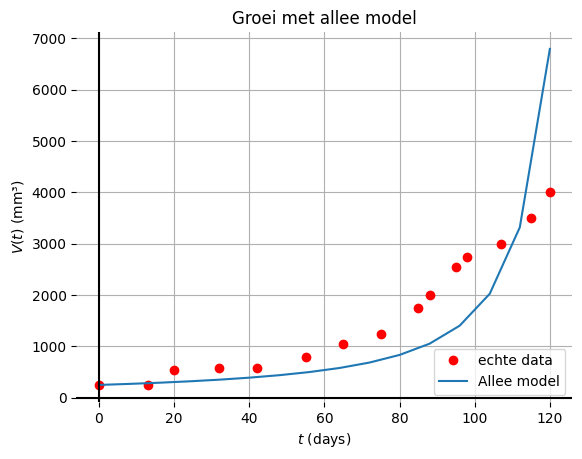

In [26]:
voorbeeld2 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "min_volume" : 0, "max_volume" : 0}
params, mse = voorbeeld2.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, min_volume, max_volume: voorbeeld2.allee(c, min_volume, max_volume),
    params0 = params0
)

dagen, volumes = voorbeeld2.allee(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld2.plot(dagen, volumes, "Allee model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met allee model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

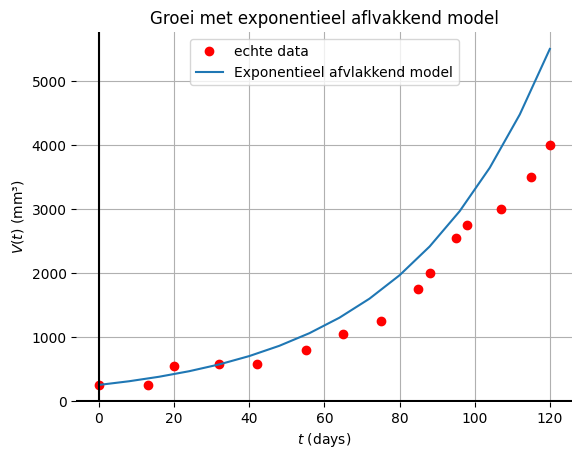

In [14]:
voorbeeld3 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "max_volume" : 0}
params, mse = voorbeeld3.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: voorbeeld3.exponentieel_afvlakkend(c, max_volume),
    params0 = params0
)

dagen, volumes = voorbeeld3.exponentieel_afvlakkend(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld3.plot(dagen, volumes, "Exponentieel afvlakkend model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met exponentieel aflvakkend model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

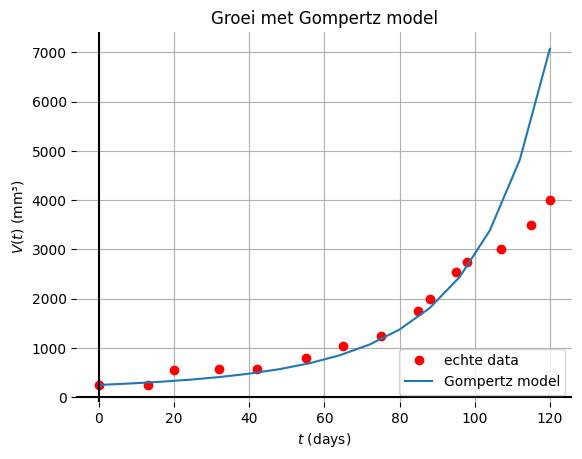

In [15]:
voorbeeld4 = ode_solver(250, 15, 8)
params0 = {"c" : 0.1, "volume_max" : 100}
params, mse = voorbeeld4.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, volume_max: voorbeeld4.gompertz(c, volume_max),
    params0 = params0
)

dagen, volumes = voorbeeld4.gompertz(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld4.plot(dagen, volumes, "Gompertz model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Gompertz model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

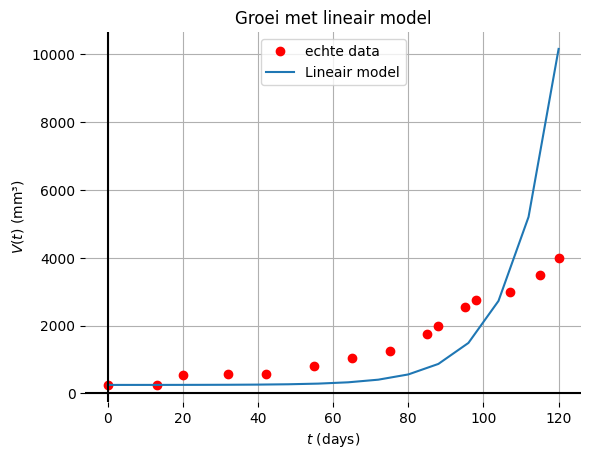

In [16]:
voorbeeld5 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0}
params, mse = voorbeeld5.fit(
    echte_volumes=  Vs_exact,
    model = lambda c: voorbeeld5.lineair(c),
    params0 = params0
)

dagen, volumes = voorbeeld5.lineair(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld5.plot(dagen, volumes, "Lineair model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met lineair model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

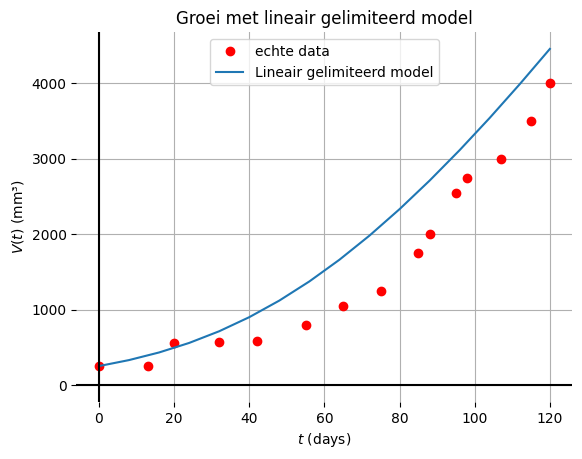

In [17]:
voorbeeld6 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "d" : 0}
params, mse = voorbeeld6.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: voorbeeld6.lineair_gelimiteerd(c, d),
    params0 = params0
)

dagen, volumes = voorbeeld6.lineair_gelimiteerd(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld6.plot(dagen, volumes, "Lineair gelimiteerd model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met lineair gelimiteerd model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

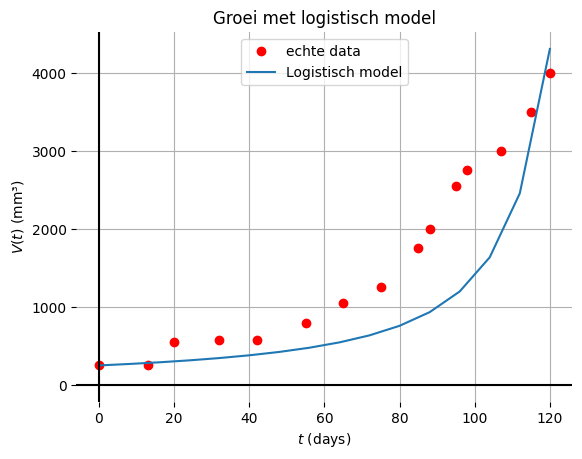

In [38]:
voorbeeld7 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "max_volume" : 10}
params, mse = voorbeeld7.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, max_volume: voorbeeld7.logistisch(c, max_volume),
    params0 = params0
)

dagen, volumes = voorbeeld7.logistisch(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld7.plot(dagen, volumes, "Logistisch model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met logistisch model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

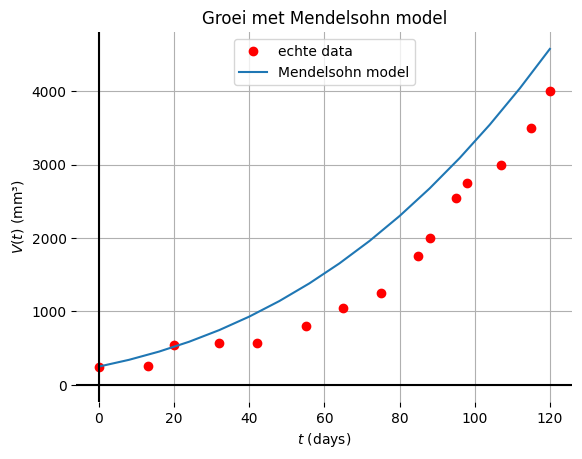

In [19]:
voorbeeld8 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "d" : 0}
params, mse = voorbeeld8.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: voorbeeld8.mendelsohn(c, d),
    params0 = params0
)

dagen, volumes = voorbeeld8.mendelsohn(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld8.plot(dagen, volumes, "Mendelsohn model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Mendelsohn model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

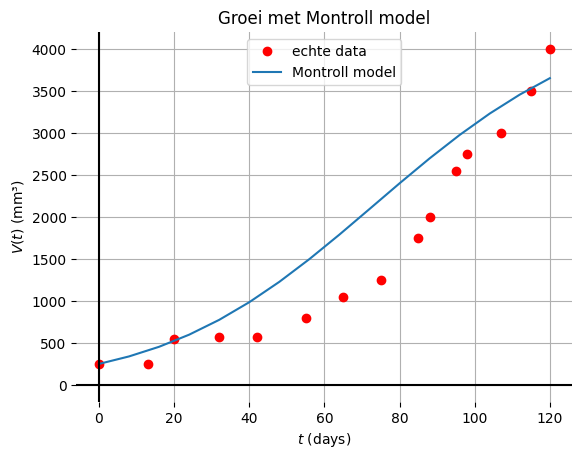

In [20]:
voorbeeld9 = ode_solver(250, 15, 8)
params0 = {"c" : 0.25, "d" : 1.0, "max_volume" : 4500.0}
params, mse = voorbeeld9.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d, max_volume: voorbeeld9.montroll(c, d, max_volume),
    params0 = params0
)

dagen, volumes = voorbeeld9.montroll(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld9.plot(dagen, volumes, "Montroll model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Montroll model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

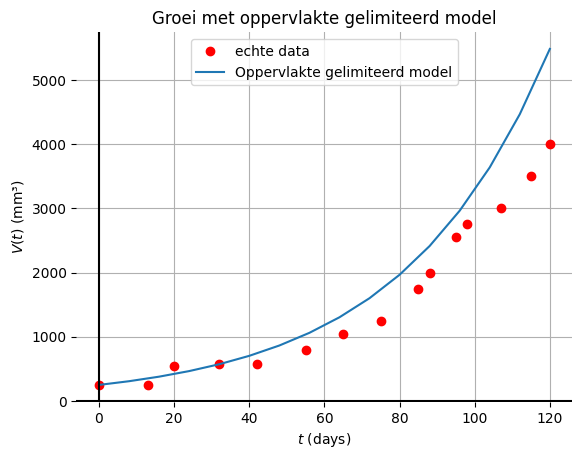

In [21]:
voorbeeld10 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "d" : 0.0}
params, mse = voorbeeld10.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: voorbeeld10.oppervlakte_gelimiteerd(c, d),
    params0 = params0
)

dagen, volumes = voorbeeld10.oppervlakte_gelimiteerd(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld10.plot(dagen, volumes, "Oppervlakte gelimiteerd model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met oppervlakte gelimiteerd model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()

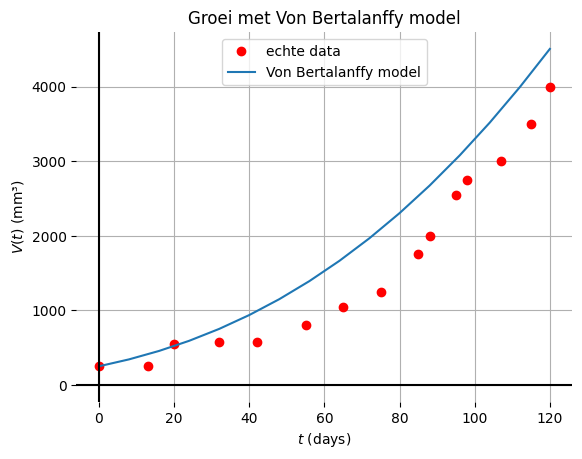

In [22]:
voorbeeld11 = ode_solver(250, 15, 8)
params0 = {"c" : 0.0, "d" : 0.0}
params, mse = voorbeeld11.fit(
    echte_volumes=  Vs_exact,
    model = lambda c, d: voorbeeld11.von_bertalanffy(c, d),
    params0 = params0
)

dagen, volumes = voorbeeld11.von_bertalanffy(**params)

plt.plot(ts_exact, Vs_exact, "or", label = "echte data")
voorbeeld11.plot(dagen, volumes, "Von Bertalanffy model")

plt.axhline(0.0, color="k"); plt.axvline(0.0, color="k")
plt.title("Groei met Von Bertalanffy model"); plt.xlabel("$t$ (days)"); plt.ylabel("$V(t)$ (mm³)")
plt.grid(True); plt.box(False)
plt.legend()

plt.show()